20% death rate per day per populations

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

from scipy.io import mmread
from scipy.sparse import csr_matrix, save_npz, load_npz

In [2]:
clones = load_npz('./clone_meta.npz').todense()
clones.shape

(130887, 5864)

In [9]:
np.max(clones.sum(1))

1

cells in rows, columns is clones

In [6]:
adata = sc.read_h5ad('./klein_paga.h5ad')
adata

AnnData object with n_obs × n_vars = 126861 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
adata.obs

,Time_point,Population,Annotation,Well,time_cat,leiden,comb,label_man
0,6.0,LK,undiff,2,6.0,16,undiff_16,prog_2
1,6.0,LK,undiff,2,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast
2,6.0,LK,Monocyte,2,6.0,3,Monocyte_3,prog_Mono
3,6.0,LK,Neutrophil,2,6.0,12,Neutrophil_12,early_prog_Neu
4,6.0,LK,undiff,2,6.0,9,undiff_9,prog_Meg_Ery
...,...,...,...,...,...,...,...,...
130882,6.0,LSK,undiff,1,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast
130883,6.0,LSK,undiff,1,6.0,0,undiff_0,prog_2
130884,6.0,LSK,Monocyte,1,6.0,2,Monocyte_2,Mono
130885,6.0,LSK,Monocyte,1,6.0,2,Monocyte_2,Mono


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


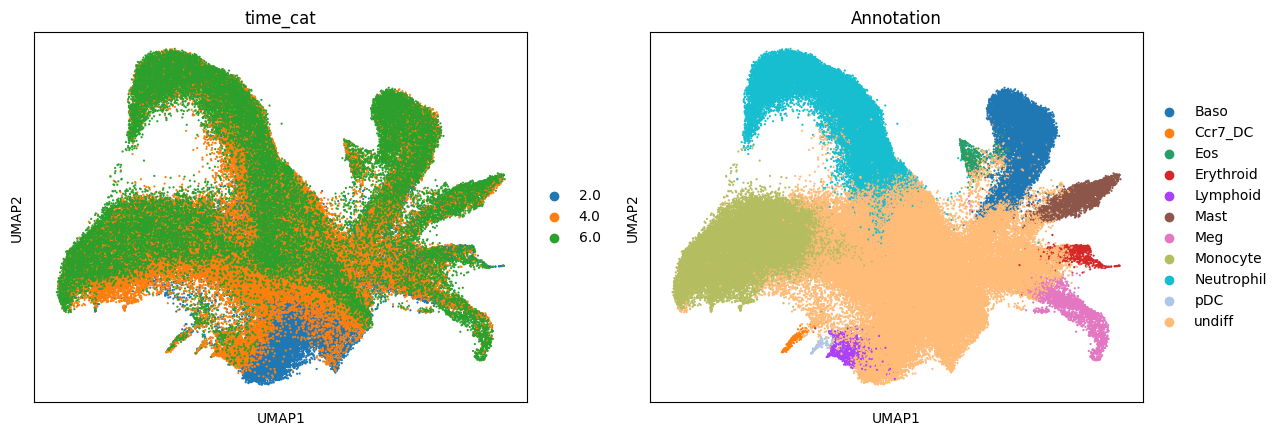

In [16]:
sc.pl.umap(adata, color=['time_cat', 'Annotation'], s=10)

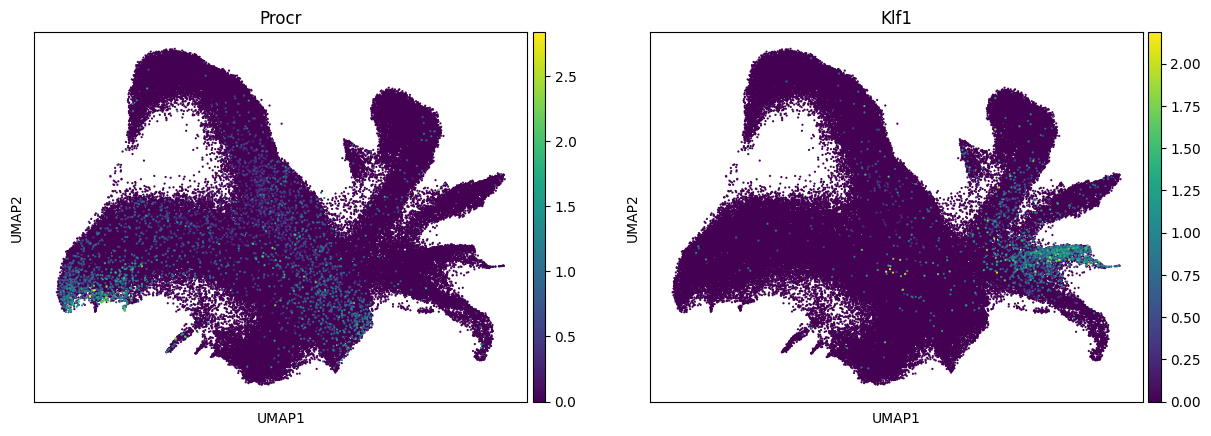

In [21]:
sc.pl.umap(adata, color=['Procr', 'Klf1'], s=10)

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


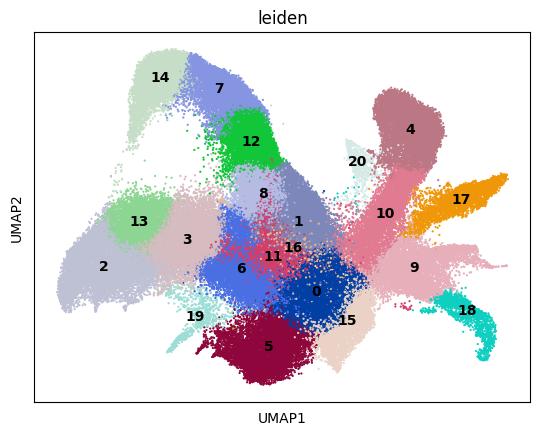

In [22]:
sc.pl.umap(adata, color=['leiden'], legend_loc='on data', s=10)

In [23]:
crosstab = pd.crosstab(adata.obs.leiden, adata.obs.Annotation)
crosstab

Annotation,Baso,Ccr7_DC,Eos,Erythroid,Lymphoid,Mast,Meg,Monocyte,Neutrophil,pDC,undiff
leiden,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,14687
1,0,0,0,0,0,0,0,2,667,0,8755
2,0,0,0,0,0,0,0,8481,2,0,217
3,0,0,0,0,0,0,0,5819,15,0,2499
4,7607,0,74,0,0,0,0,12,7,0,245
5,0,0,0,0,856,0,0,4,0,100,6778
6,0,0,0,0,0,0,0,75,1,0,7215
7,0,0,0,0,0,0,0,0,6609,0,0
8,0,0,0,0,0,0,0,0,3038,0,3696


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


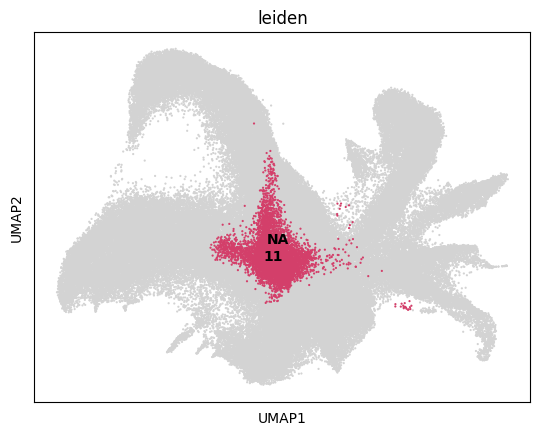

In [24]:
sc.pl.umap(adata, color=['leiden'], groups='11', legend_loc='on data', s=10)

In [25]:
adata.obs

,Time_point,Population,Annotation,Well,time_cat,leiden,comb,label_man
0,6.0,LK,undiff,2,6.0,16,undiff_16,prog_2
1,6.0,LK,undiff,2,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast
2,6.0,LK,Monocyte,2,6.0,3,Monocyte_3,prog_Mono
3,6.0,LK,Neutrophil,2,6.0,12,Neutrophil_12,early_prog_Neu
4,6.0,LK,undiff,2,6.0,9,undiff_9,prog_Meg_Ery
...,...,...,...,...,...,...,...,...
130882,6.0,LSK,undiff,1,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast
130883,6.0,LSK,undiff,1,6.0,0,undiff_0,prog_2
130884,6.0,LSK,Monocyte,1,6.0,2,Monocyte_2,Mono
130885,6.0,LSK,Monocyte,1,6.0,2,Monocyte_2,Mono


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


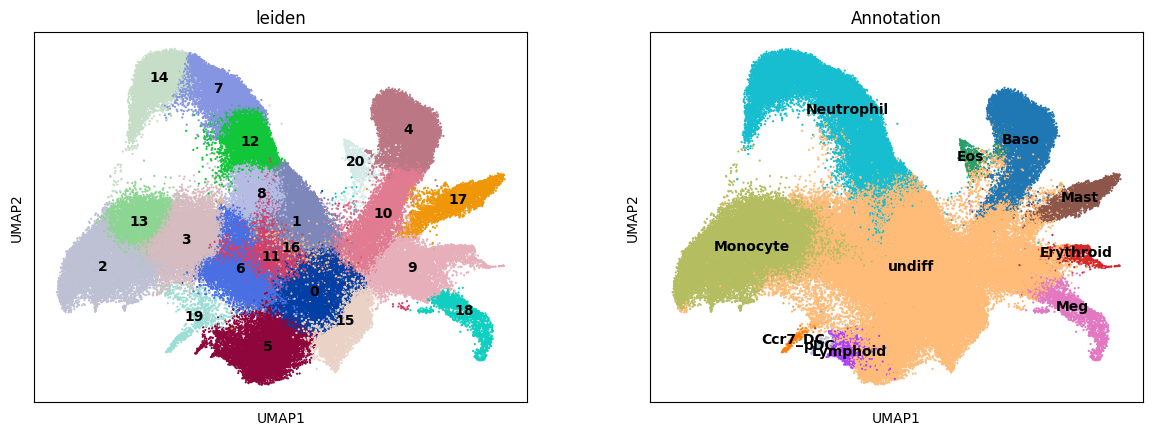

In [26]:
sc.pl.umap(adata, color=['leiden', 'Annotation'], legend_loc='on data', s=10)

In [28]:
np.unique(adata.obs['label_man'])

array(['Baso', 'DC', 'Eos', 'Ery', 'Ly', 'Mast', 'Meg', 'Mono', 'Neu',
       'early_prog_Neu', 'pDC', 'prog_1', 'prog_2', 'prog_3', 'prog_4',
       'prog_Baso_Eos', 'prog_Baso_Meg_Ery_Mast', 'prog_DC_Mono',
       'prog_Ly_pDC', 'prog_Meg_Ery', 'prog_Mono', 'prog_Neu'],
      dtype=object)

In [31]:
df_3 = pd.DataFrame(adata.obs['comb'].value_counts())
df_3.iloc[40:,:]

,comb
Monocyte_14,32
Baso_17,18
Neutrophil_3,15
Monocyte_4,12
Neutrophil_4,7
Neutrophil_18,7
Neutrophil_20,6
Neutrophil_16,5
Mast_10,4
Monocyte_5,4


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


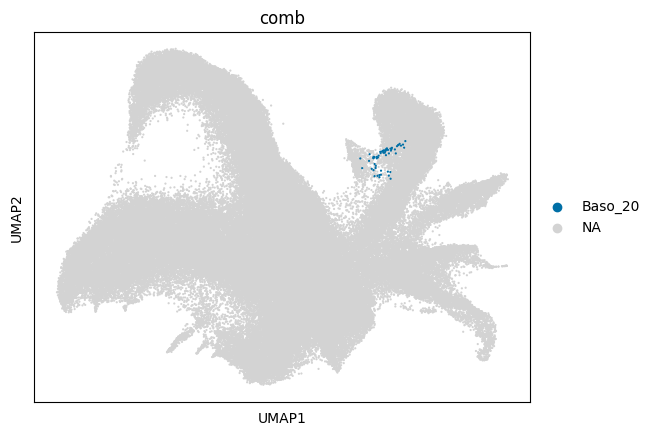

In [34]:
sc.pl.umap(adata, color=['comb'], groups='Baso_20', s=10)

In [35]:
df_3.loc[df_3.index.str.startswith('Mono')]

,comb
Monocyte_2,8481
Monocyte_3,5819
Monocyte_13,4426
Monocyte_11,176
Monocyte_6,75
Monocyte_14,32
Monocyte_4,12
Monocyte_5,4
Monocyte_17,4
Monocyte_16,3


In [36]:
df_3.loc[df_3.index.str.endswith('_20')]

,comb
Eos_20,471
undiff_20,236
Baso_20,57
Neutrophil_20,6
Mast_20,3
Meg_20,1
Monocyte_20,1
Erythroid_20,1


In [37]:
adata.obs

,Time_point,Population,Annotation,Well,time_cat,leiden,comb,label_man
0,6.0,LK,undiff,2,6.0,16,undiff_16,prog_2
1,6.0,LK,undiff,2,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast
2,6.0,LK,Monocyte,2,6.0,3,Monocyte_3,prog_Mono
3,6.0,LK,Neutrophil,2,6.0,12,Neutrophil_12,early_prog_Neu
4,6.0,LK,undiff,2,6.0,9,undiff_9,prog_Meg_Ery
...,...,...,...,...,...,...,...,...
130882,6.0,LSK,undiff,1,6.0,10,undiff_10,prog_Baso_Meg_Ery_Mast
130883,6.0,LSK,undiff,1,6.0,0,undiff_0,prog_2
130884,6.0,LSK,Monocyte,1,6.0,2,Monocyte_2,Mono
130885,6.0,LSK,Monocyte,1,6.0,2,Monocyte_2,Mono


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


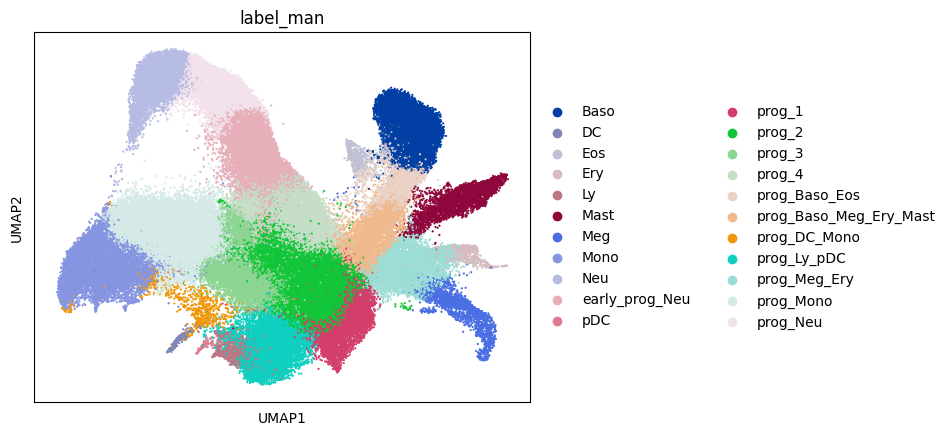

In [38]:
sc.pl.umap(adata, color=['label_man'], s=10)

In [39]:
pd.DataFrame(adata.obs['label_man'].value_counts())

,label_man
prog_2,23650
prog_Mono,12939
prog_4,12453
early_prog_Neu,10126
Mono,8558
Baso,7626
prog_3,7216
prog_Ly_pDC,6782
prog_Neu,6609
prog_Meg_Ery,5539


/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)
/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


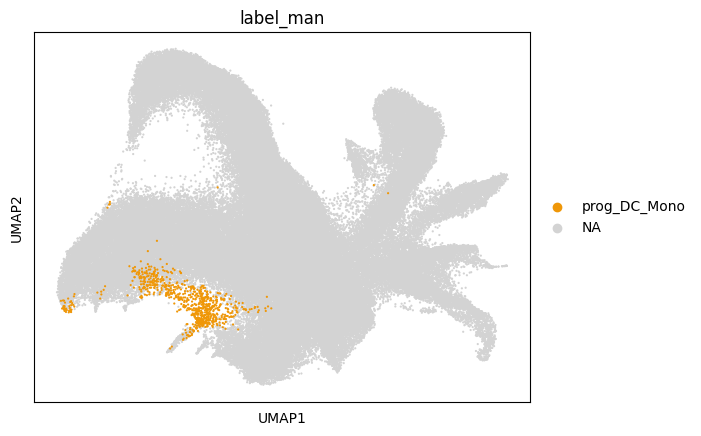

In [40]:
sc.pl.umap(adata, color=['label_man'], groups='prog_DC_Mono', s=10)

/data/users/mingzegao/.conda/envs/pytorch/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


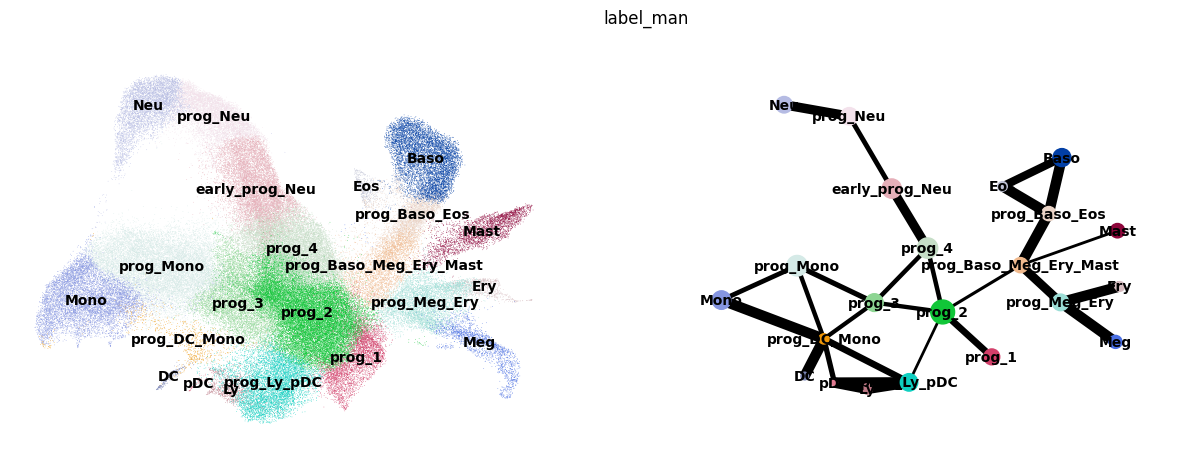

In [42]:
sc.tl.paga(adata, groups='label_man')
sc.pl.paga_compare(adata, threshold = 0.25)

In [43]:
adata

AnnData object with n_obs × n_vars = 126861 × 5000
    obs: 'Time_point', 'Population', 'Annotation', 'Well', 'time_cat', 'leiden', 'comb', 'label_man'
    var: 'symbol', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Annotation_colors', 'comb_colors', 'hvg', 'label_man_colors', 'label_man_sizes', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'paga', 'pca', 'time_cat_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [50]:
paga = pd.read_excel('./mingze_weinreb.xlsx', index_col=0)
paga = paga.fillna(0.0)
paga.to_csv('./graph_table.csv')

<AxesSubplot: >

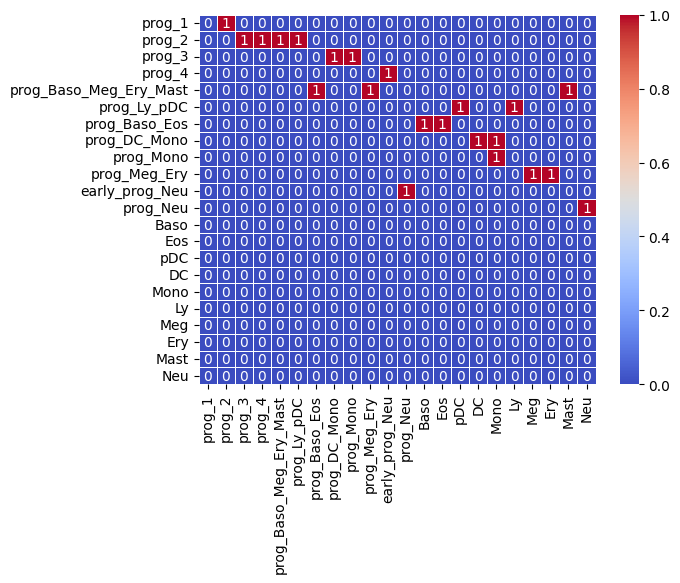

In [52]:
import seaborn as sns
sns.heatmap(paga, annot=True, linewidth=.5, cmap='coolwarm')

In [59]:
anno = pd.DataFrame(columns=['populations'], index=['Clone ' + str(i) for i in range(paga.shape[0])])
anno['populations'] = paga.columns
anno.to_csv('./annotations.csv', index_label='clones')